# Best Selling Gaming Consoles


![where-to-buy-console-games-in-dubai-A-26-01-1024x640](where-to-buy-console-games-in-dubai-A-26-01-1024x640.jpeg)


This dataset contains information about the best-selling game consoles of all time. The data includes the console name, manufacturer, release year, total units sold, and some other information. The dataset covers a wide range of consoles, from the earliest releases to the current generation of consoles.



In [101]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting  style in python with HTML and Css 
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

#Dataset

gaming = pd.read_csv('best-selling game consoles.csv')

## Exploring Dataframe

In [102]:
gaming.head()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN


In [103]:
#info

gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released Year         51 non-null     int64  
 4   Discontinuation Year  51 non-null     int64  
 5   Units sold (million)  51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


## Checking for data missing 

In [104]:
#data missing 

print(gaming.isnull().sum())

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64


## Drop the 'Remarks' column as it contains a lot of missing values

In [105]:
gaming = gaming.drop('Remarks', axis=1)

## Check the statistics of the numerical columns

In [106]:
gaming.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


# analyzing data

## Rename column Units sold (million) to units sold million

In [107]:
new_gaming = gaming.rename(columns={"Units sold (million)":"units sold million"})
new_gaming.head()

,Console Name,Type,Company,Released Year,Discontinuation Year,units sold million
0,PlayStation 2,Home,Sony,2000,2013,155.00
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55
3,Game Boy,Handheld,Nintendo,1989,2003,64.42
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06


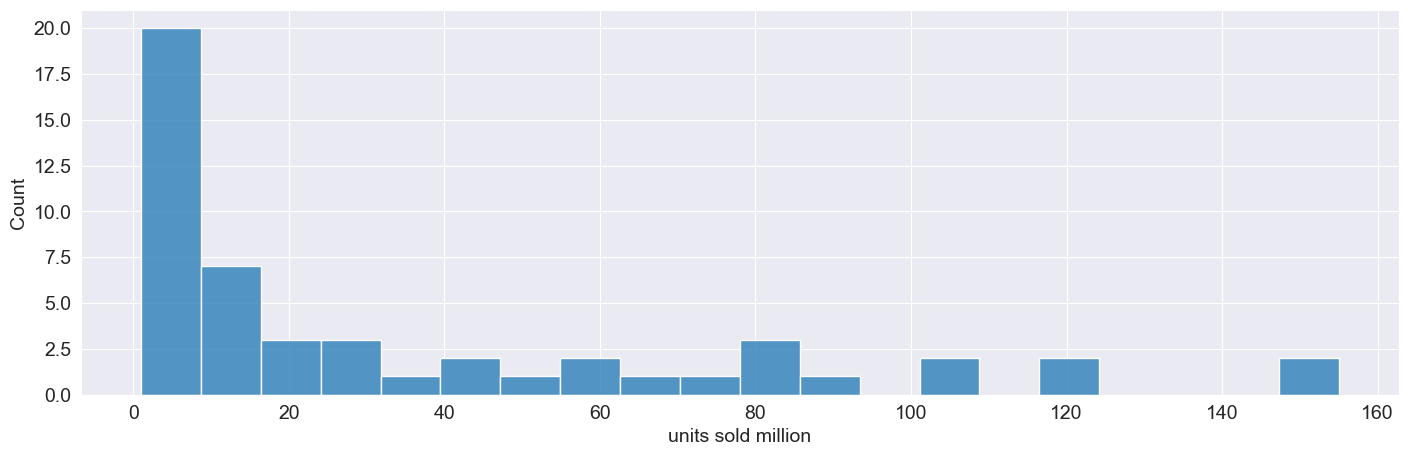

In [108]:
# Visualize the distribution of the 'units sold million'

sns.histplot(x='units sold million', data=new_gaming, bins=20)
plt.show()

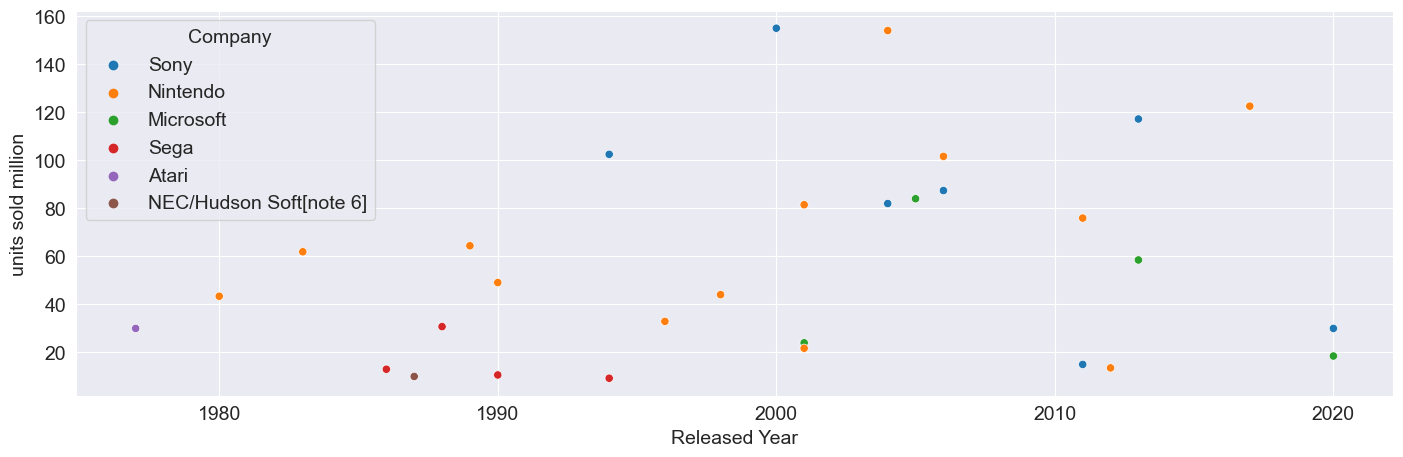

In [109]:
## Visualize the relationship between 'Released Year' and 'Units Sold'

sold_year = new_gaming.head(30)

sns.scatterplot(x='Released Year', y='units sold million',
                data=sold_year, hue='Company' )
plt.show()

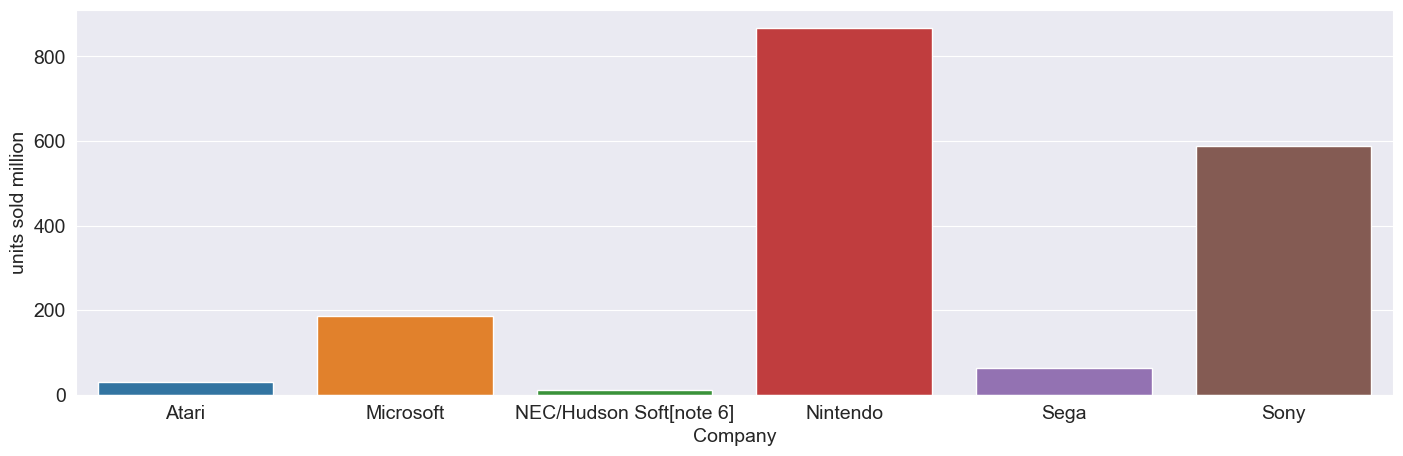

In [110]:
#calculate the total units sold for top company

total_units_sold = sold_year.groupby('Company')['units sold million'].sum().reset_index()

#Creating bar plot
sns.barplot(data=total_units_sold, x='Company', y='units sold million')
plt.show()

## TOP 5 Sellers 

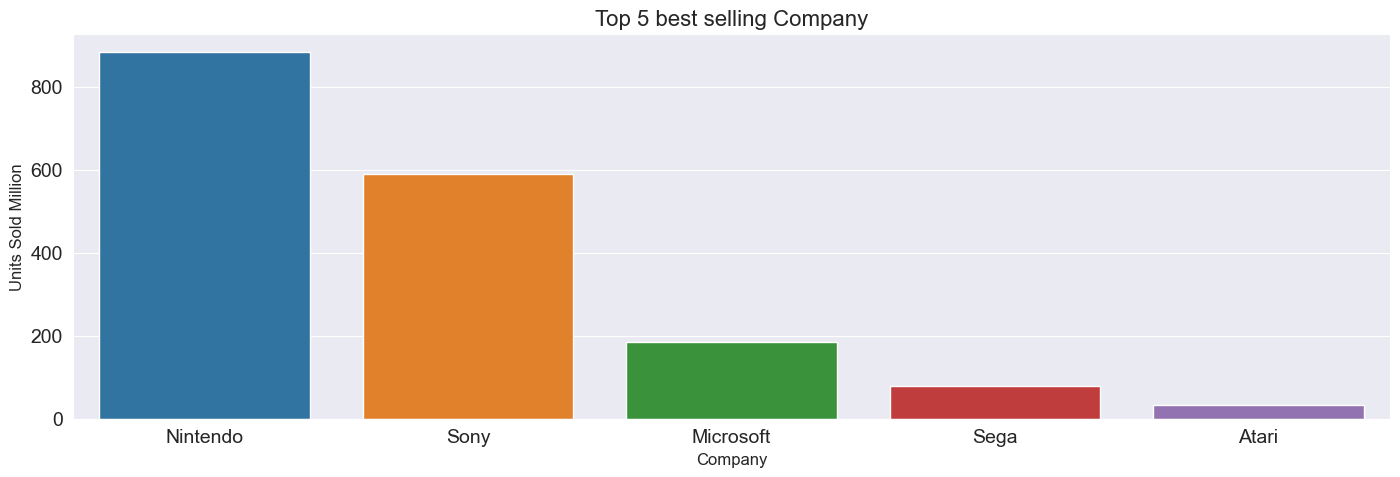

In [111]:
# Group the data by 'Company' and calculate the total units sold for each company
total_units_sold = new_gaming.groupby('Company')['units sold million'].sum().reset_index()

# Sort the DataFrame by 'Units sold (million)' in descending order and select the top 5 rows
top_5_company = total_units_sold.sort_values('units sold million', ascending=False).head(5)


#Creating bar plot 

sns.barplot(x='Company', y='units sold million', data=top_5_company)
plt.title("Top 5 best selling Company", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Units Sold Million", fontsize=12)
plt.show()

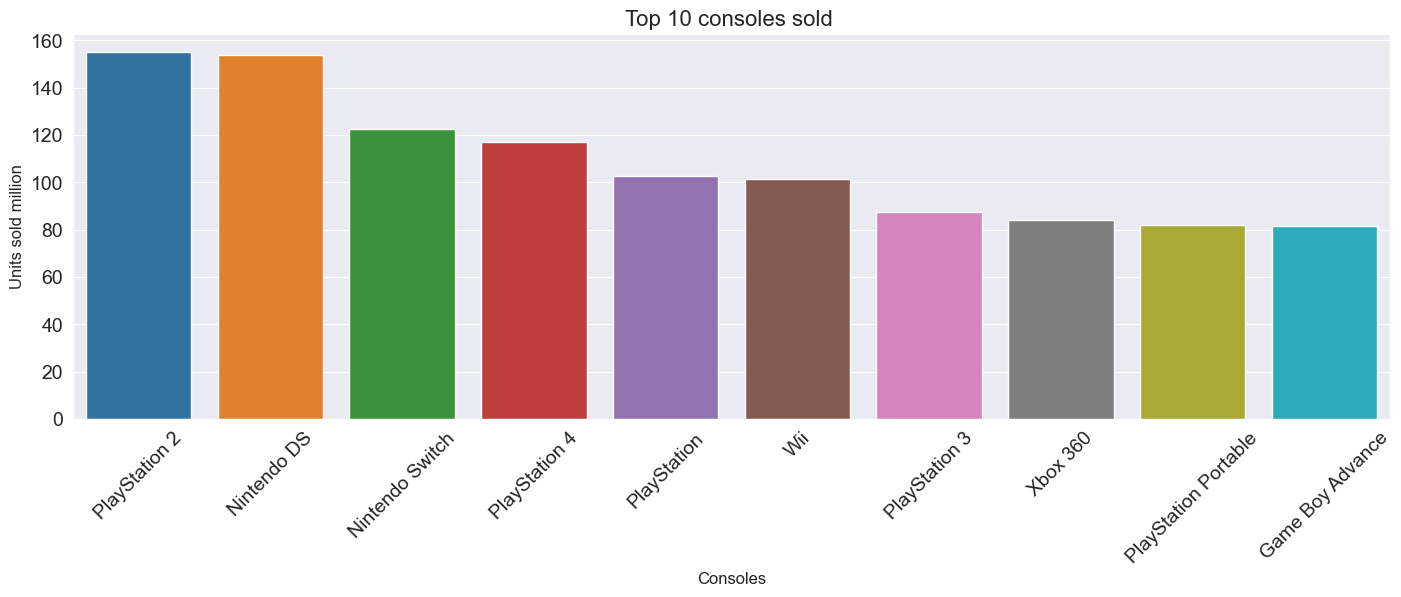

In [112]:
# Sort by Units sold in descending order and select the top 10 consoles.

consoles = new_gaming.sort_values('units sold million', ascending=False).head(10)

#Creating a bar plot top 10 consoles

sns.barplot(x='Console Name', y='units sold million', data=consoles)
plt.title('Top 10 consoles sold ', fontsize=16)
plt.xlabel('Consoles', fontsize=12)
plt.ylabel('Units sold million', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Time series 

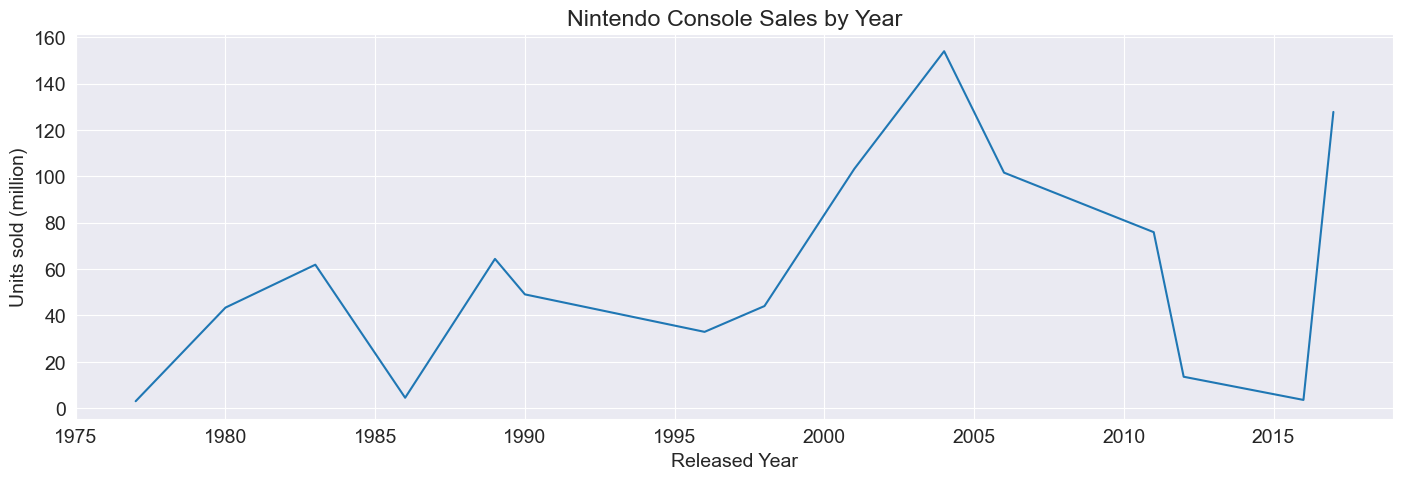

In [113]:
# Nintendo sales by year 

nintendo_sold = new_gaming[new_gaming['Company'] == 'Nintendo']

# Group by released year and calculate total units sold for each year

units_sold_year = nintendo_sold.groupby('Released Year')['units sold million'].sum().reset_index()
units_sold_year = units_sold_year.rename(columns={'units sold million': 'units_sold_million'})

#creating a line plot 
sns.lineplot(x='Released Year', y='units_sold_million',
             data=units_sold_year,)
plt.ylabel('Units sold (million)')
plt.title('Nintendo Console Sales by Year')
plt.show()

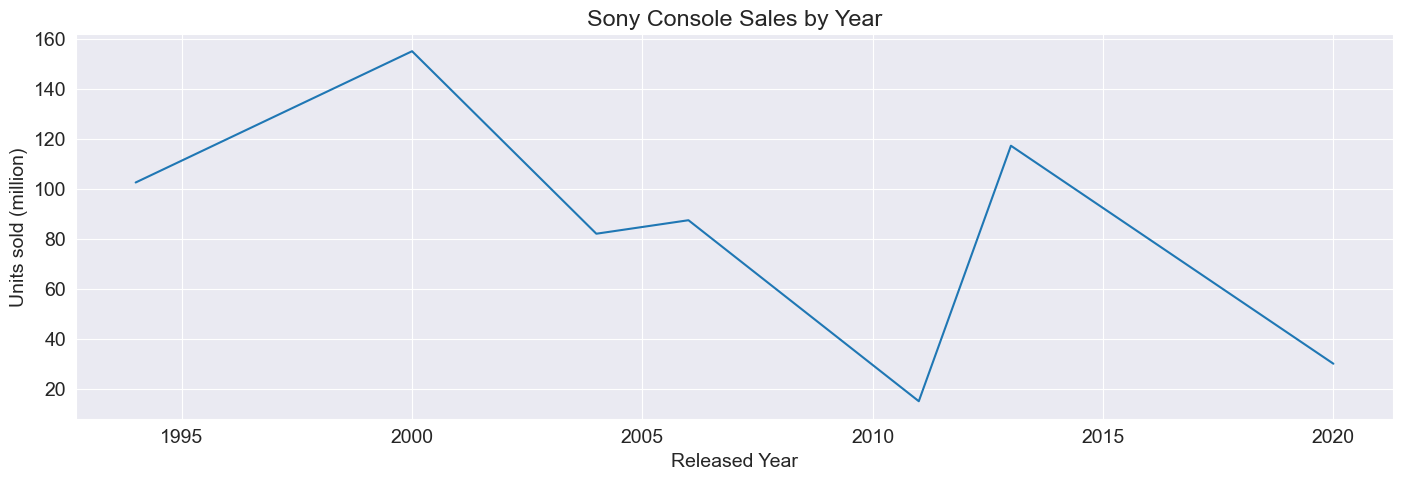

In [114]:
# Sony sales by year 

nintendo_sold = new_gaming[new_gaming['Company'] == 'Sony']

# Group by released year and calculate total units sold for each year

units_sold_year = nintendo_sold.groupby('Released Year')['units sold million'].sum().reset_index()
units_sold_year = units_sold_year.rename(columns={'units sold million': 'units_sold_million'})

#creating a line plot 
sns.lineplot(x='Released Year', y='units_sold_million',
             data=units_sold_year,)
plt.ylabel('Units sold (million)')
plt.title('Sony Console Sales by Year')
plt.show()

# Thank you very much for taking the time to read this mini-project.